# 🚀 EDA de los datasets limpios

En este notebook se realiza el Análisis Exploratorio de los datos de los tres dataset ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

#### 📥Importaciones 

In [47]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

### 🚀 EDA del dataset `steam_games`

Se desarrolla el Análisis Exploratorio de los Datos del dataset `steam_games` que ya pasó por el proceso de ETL.

#### 📦 Extracción y lectura del dataset

Se leen los datos de .csv y se convierte en dataframe.

In [2]:
df_juegos = pd.read_csv('Data/df_games_unido.csv', encoding='utf-8')
df_juegos.head()

,genres,id,release_anio,publisher,app_name,title,developer
0,Action,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


Se crea una funcion para revisar los tipos de datos y la cantidad de nulos.

In [3]:
def verificar_tipo_datos(df):

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(mi_dict)
        
    return df_info

In [4]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_juegos.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_juegos)

La cantidad de registros que hay son: 71551


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.00,0.00,0
1,id,[<class 'int'>],100.00,0.00,0
2,release_anio,[<class 'str'>],100.00,0.00,0
3,publisher,"[<class 'str'>, <class 'float'>]",99.93,0.07,47
4,app_name,[<class 'str'>],100.00,0.00,0
5,title,[<class 'str'>],100.00,0.00,0
6,developer,[<class 'str'>],100.00,0.00,0


Este dataframe tiene 7 columnas y 71551 registros. Contiene la información relacionada a cada juego como el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador, el publicitador, y el género. Se tiene en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

#### 📄 Columnas 'id', 'app_name' y 'title'

Estas columnas hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mayor información que analizar en este momento. Con el 'id' se puede calcular la cantidad de juegos.

In [5]:
total_juegos = len(df_juegos['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 28850


Hay un total de 28850 juegos en la plataforma.

#### 📄 Columna 'genres'

Esta columna hce referencia al género del juego. Esta formado por una lista de uno o mas géneros por registro.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\3002081567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_juegos, y='genres', orient='h', palette='viridis')


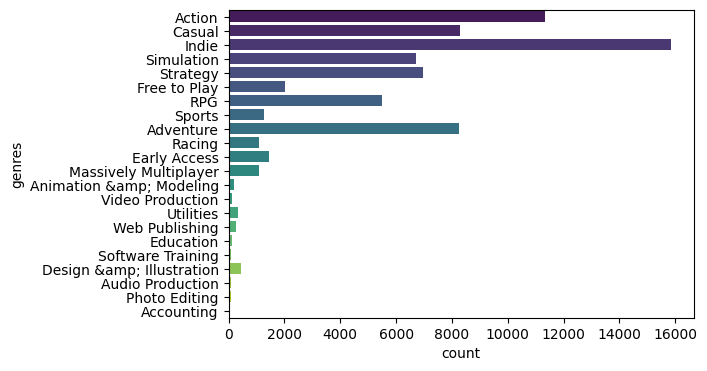

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_juegos, y='genres', orient='h', palette='viridis')
plt.show()

Se crea una función que cuenta la cantidad de True/False en la columna y luego calcula el porcentaje.

In [7]:
def resumen_cant_porcentaje(df, columna):
    # Se cuenta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Se crea un dataframe con el resumen
    df_results = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_results

In [8]:
resumen_cant_porcentaje(df_juegos, 'genres')

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11319,15.82
Casual,8282,11.57
Adventure,8242,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


Los juegos estan categorizados mayormente en *Indie*, *Action*, *Casual* y *Adventure*. Aunque un juego puede tener mas de un género asociado.

#### 📄 Columna 'release_anio'

In [9]:
resumen_cant_porcentaje(df_juegos, 'release_anio')[:10]

,Cantidad,Porcentaje
release_anio,,
2017,24967,34.89
2016,17667,24.69
2015,12256,17.13
2014,6341,8.86
2013,3016,4.22
2012,2106,2.94
2011,986,1.38
Dato no disponible,850,1.19
2010,653,0.91


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\711800081.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_anios.index, y=conteo_anios.values, palette='viridis')


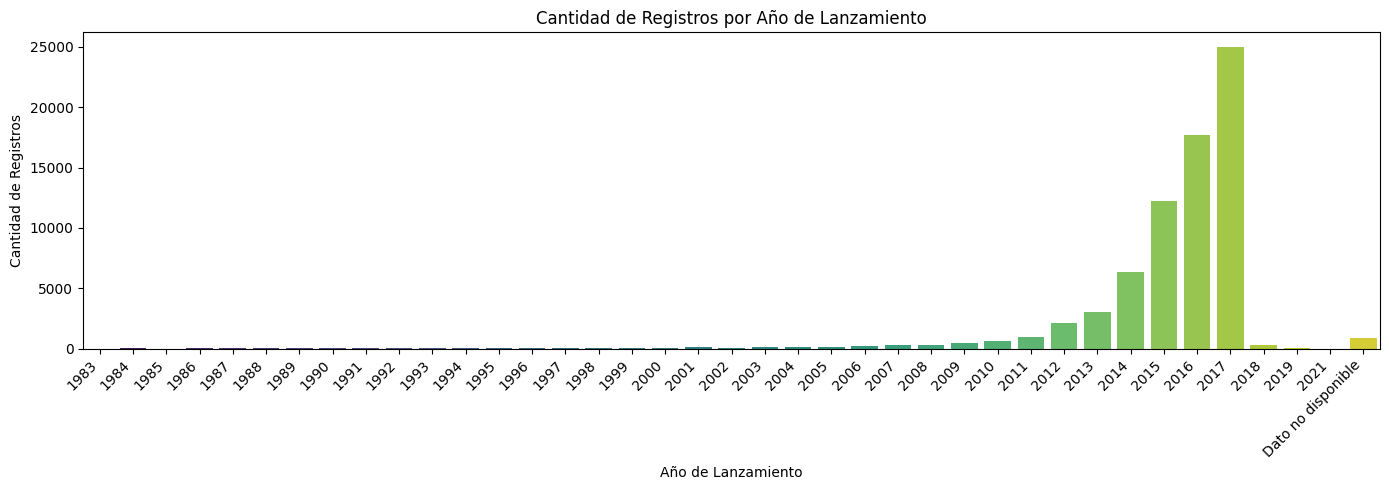

In [10]:
# Se cuenta la frecuencia de cada año
conteo_anios = df_juegos['release_anio'].value_counts()

# Se ordenan los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Se ordenan los valores por año
conteo_anios = conteo_anios.sort_index()

# Se crea la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values, palette='viridis')
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Se filtran los registros con valores numéricos en la columna 'release_anio'
registros_numericos = df_juegos[df_juegos['release_anio'].str.isnumeric()]
# Se convierte la columna 'release_anio' a valores enteros
registros_numericos['release_anio'] = registros_numericos['release_anio'].astype(int)
# Se filtran los registros con años de lanzamiento antes de 2002
registros_antes_2003 = registros_numericos[registros_numericos['release_anio'] < 2003]

print(f"Cantidad de registros antes de 2003: {len(registros_antes_2003)}")
print(f"Cantidad de registros 'Dato no disponible': {df_juegos[df_juegos['release_anio'] == 'Dato no disponible'].shape[0]}")

Cantidad de registros antes de 2003: 741
Cantidad de registros 'Dato no disponible': 850


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\1728595944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_numericos['release_anio'] = registros_numericos['release_anio'].astype(int)


Se pueden ver 741 juegos lanzados en años anteriores al 2003 lo que puede ser un error porque la plataforma se lanzó en el 2003. 

Se observan 850 juegos sin la fecha disponible debido a que no estaba especificada o estaba en un formato incorrecto. 

Se ve el crecimiento constante y lento hasta 2011 y luego crece mas rápidamente hasta 2017. A partir de allí, la plataforma limitó la forma de obtener las estadísticas, por eso se ven muchos menos registros.

#### 📄 Columnas 'publisher' y 'developer'

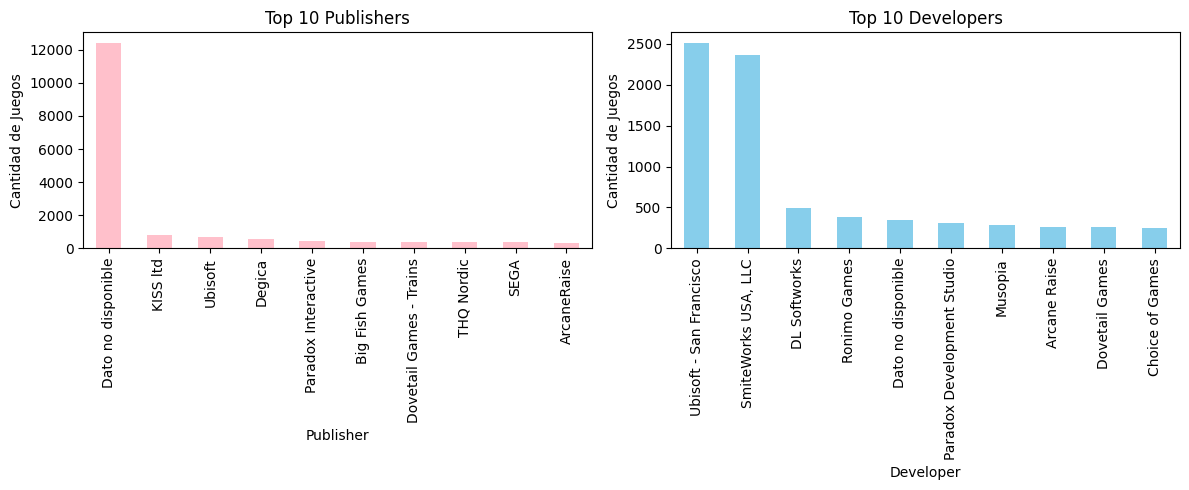

In [12]:
# Se cuenta la cantidad de juegos por publisher
conteo_publisher = df_juegos['publisher'].value_counts()

# Se cuenta la cantidad de juegos por developer
conteo_developer = df_juegos['developer'].value_counts()

# Se crea una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='pink')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Se muestra y ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()

En el caso de los publicistas de juegos, la mayor cantidad no dispone del dato.

En el caso de los desarrolladores, 'Ubisoft' y 'SmiteWorks' son los desarrolladores que mas juegos han desarrollado para la plataforma.

### 🚀 EDA del dataset `users_items`

Se desarrolla el Análisis Exploratorio de los Datos del dataset `users_items` que ya pasó por el proceso de ETL.

#### 📦 Extracción y lectura del dataset

Se leen los datos de .csv y se convierte en dataframe.

In [13]:
df_items = pd.read_csv('Data/df_items_unido.csv', encoding='utf-8')
df_items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Se revisan los tipos de datos y la cantidad de nulos.

In [14]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_items)

La cantidad de registros que hay son: 5094105


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'int'>],100.0,0.0,0
3,steam_id,[<class 'int'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,user_id,[<class 'str'>],100.0,0.0,0
6,user_url,[<class 'str'>],100.0,0.0,0


Este dataframe tiene 7 columnas y 5094105 registros. Contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego y la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario.

#### 📄 Columna 'playtime_forever'

Esta columna hace referencia al tiempo en minutos acumulados que un usuario ha jugado.

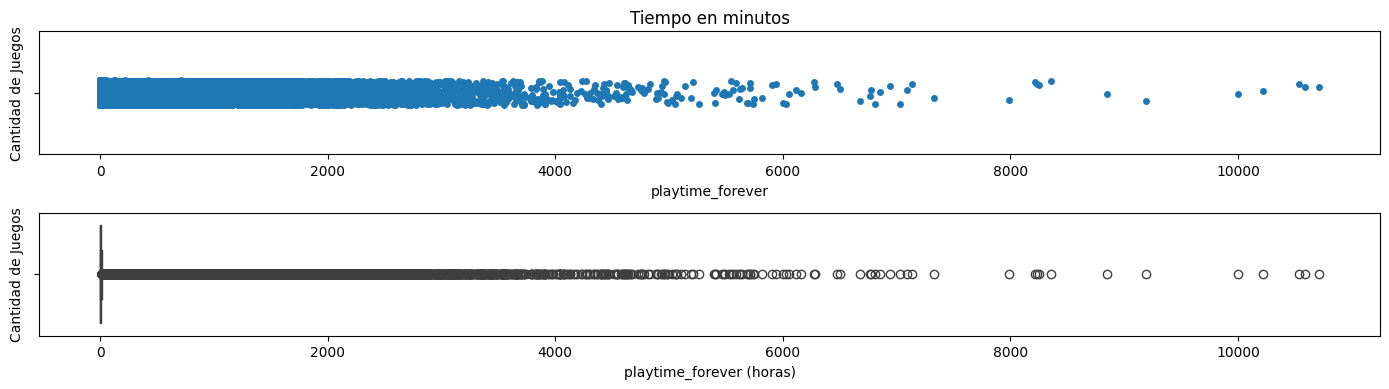

In [15]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Tiempo en minutos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()

In [16]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El tiempo medio (mediana) es de: {round(estadisticas[5],2)}')
print(f'El tiempo promedio (mean) es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un tiempo menor de: {round(estadisticas[6],2)}')

El tiempo medio (mediana) es de: 0.57
El tiempo promedio (mean) es de: 16.51
El 75% de los juegos tienen un tiempo menor de: 5.92


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\851440304.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El tiempo medio (mediana) es de: {round(estadisticas[5],2)}')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\851440304.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El tiempo promedio (mean) es de: {round(estadisticas[1],2)}')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\851440304.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

Se crea una funcion 'bigote_sup' para calcular el valor del bigote superior y la cantidad de valores atípicos en una columna. 

In [17]:
def bigote_sup(columna):
    
    # Cuartiles
    q1 = columna.describe()[4]
    q3 = columna.describe()[6]

    # Valor del vigote
    bigote_sup = round(q3 + 1.5*(q3 - q1), 2)
    print(f'El bigote superior de la variable {columna.name} se ubica en:', bigote_sup)

    # Cantidad de atípicos
    print(f'Hay {(columna > bigote_sup).sum()} valores atípicos en la variable {columna.name}')

In [18]:
bigote_sup(df_items['playtime_hours'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\3985153028.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q1 = columna.describe()[4]


El bigote superior de la variable playtime_hours se ubica en: 14.79
Hay 763606 valores atípicos en la variable playtime_hours


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\3985153028.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q3 = columna.describe()[6]


Se puede observar que cada usuario, por juego, pasa un tiempo medio de 0.57 hs jugando y el 75% de los jugadores estuvieron menos de 6 hs jugando a un juego, pero se observa una gran cantidad de valores atípicos por encima de las 14.79 hs que juega cada usuario a un juego. Esto podría deberse al uso de bots que utilizan el mismo perfil de usuario para jugar en simultaneo, lo que generaría una distorsión de los tiempos reales de juego.

#### 📄 Columna 'items_count'

Esta columna indica la cantidad de juegos que consumen o compraron alguna vez los usuarios.

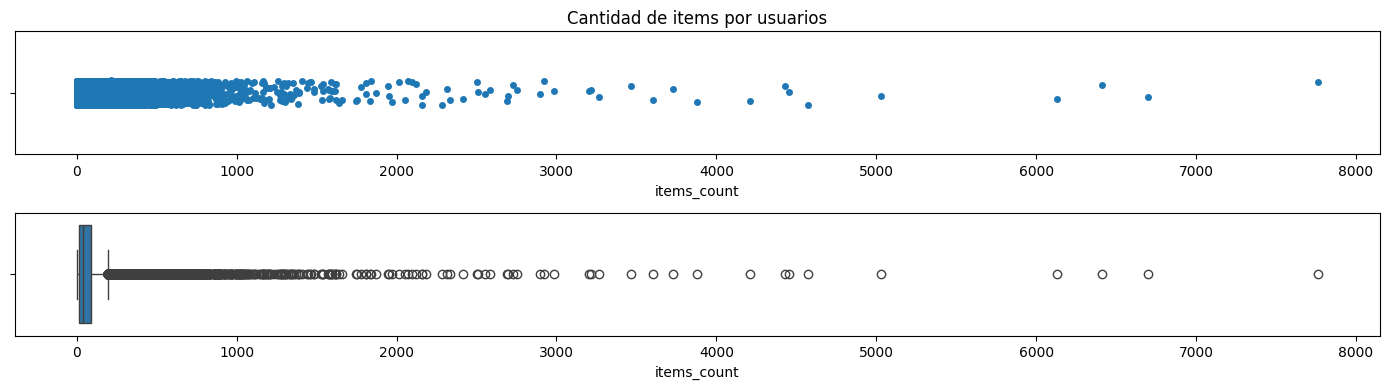

In [19]:
# Se agrupa por usuario la cantidad de items, se convierte en dataframe y se ordenan de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [20]:
estadisticas = items_count_user['items_count'].astype(float).describe()
print(f'El cantidad de juegos media (mediana) por usuarios es de: {round(estadisticas[5],2)}')
print(f'El cantidad de juegos promedio (mean) por usuarios es de: {round(estadisticas[1],2)}')
print(f'El 75% de los usuarios tienen una cantidad de juegos menor de: {round(estadisticas[6],2)}')
bigote_sup(items_count_user.astype(float)['items_count'])

El cantidad de juegos media (mediana) por usuarios es de: 40.0
El cantidad de juegos promedio (mean) por usuarios es de: 71.84
El 75% de los usuarios tienen una cantidad de juegos menor de: 87.0
El bigote superior de la variable items_count se ubica en: 196.5
Hay 4957 valores atípicos en la variable items_count


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\2739290146.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El cantidad de juegos media (mediana) por usuarios es de: {round(estadisticas[5],2)}')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\2739290146.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El cantidad de juegos promedio (mean) por usuarios es de: {round(estadisticas[1],2)}')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\2739290146.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

Se puede observar que cada usuario compro en algun momento una cantidad media de 40 juegos y el 75% de los jugadores compraron menos de 87 juegos.

<Figure size 1400x500 with 0 Axes>

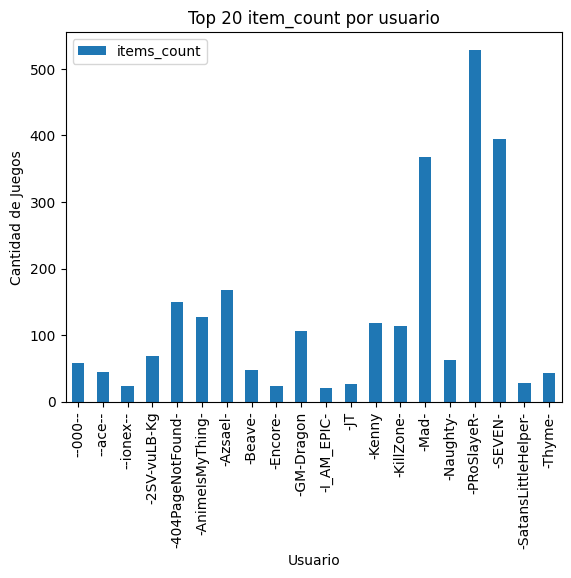

In [21]:
# Se grafican la cantidad de juegos por usuarios
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

Se puede ver que el usuario que mas cantidad de juegos a consumido ronda los 500 juegos, pero el 75% de los usuarios ha adquirido menos de 87 items. Se pueden ver 4957 usuarios que adquirieron mas de 196 items que podrían considerarse como atípicos.

### 🚀 EDA del dataset  `user_reviews`

Se desarrolla el Análisis Exploratorio de los Datos del dataset `user_reviews` que ya pasó por el proceso de ETL.

#### 📦 Extracción y lectura del dataset

Se leen los datos de .csv y se convierte en dataframe.

In [22]:
df_reviews = pd.read_csv('Data/df_reviews_unido.csv', encoding='utf-8')
df_reviews.head()

,user_id,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis,title,release_anio,developer
0,76561197970982479,1250,No ratings yet,True,2011-11-05,1,Killing Floor,2009,Tripwire Interactive
1,EndAtHallow,1250,No ratings yet,True,2015-01-15,1,Killing Floor,2009,Tripwire Interactive
2,76561198077432581,1250,No ratings yet,True,2014-12-12,1,Killing Floor,2009,Tripwire Interactive
3,76561198057958244,1250,0 of 1 people (0%) found this review helpful,True,2013-12-13,0,Killing Floor,2009,Tripwire Interactive
4,46366536564574576346346546,1250,2 of 3 people (67%) found this review helpful,True,2014-08-19,1,Killing Floor,2009,Tripwire Interactive


Se revisan los tipos de datos y la cantidad de nulos.

In [23]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_reviews)

La cantidad de registros que hay son: 48802


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,reviews_item_id,[<class 'int'>],100.0,0.0,0
2,reviews_helpful,[<class 'str'>],100.0,0.0,0
3,reviews_recommend,[<class 'bool'>],100.0,0.0,0
4,reviews_date,[<class 'str'>],100.0,0.0,0
5,sentiment_analysis,[<class 'int'>],100.0,0.0,0
6,title,[<class 'str'>],100.0,0.0,0
7,release_anio,[<class 'str'>],100.0,0.0,0
8,developer,[<class 'str'>],100.0,0.0,0


Se tienen 48802 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos, hay que recordar que en el ETL se observaron datos faltantes en la columna 'reviews_date' y se reemplazaron con 'Formato inválido'.

#### 📄 Columnas 'sentiment_analysis' y 'reviews_recommend'

Se observan las columnas 'sentiment_analysis' y 'reviews_recommend'.

In [24]:
resumen_cant_porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
1,29959,61.39
2,14646,30.01
0,4197,8.60


In [25]:
resumen_cant_porcentaje(df_reviews, 'reviews_recommend')

,Cantidad,Porcentaje
reviews_recommend,,
True,43600,89.34
False,5202,10.66


De los registros de reviews el 61% reflejan sentimientos neutrales hacia el juego, el 30% reflejan sentimientos positivos y casi el 9% fueron negativos. Pero en el 89% de los reviews se recomiendan los juegos que consumen.

En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [26]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un dataframe con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  1326    2.717102
                   True                   2871    5.882956
1                  False                  3420    7.007910
                   True                  26539   54.380968
2                  False                   456    0.934388
                   True                  14190   29.076677

Se puede observar que, en el porcentaje respecto del total de los reviews, el 54% de los reviews que reflejan un sentimiento neutral recomiendan el juego. Por otra parte, de los comentarios que reflejaron un sentimiento negativo cerca del 6% aún recomienda el juego, lo que es algo contradictorio.

In [27]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 22973


Un total de 22973 usurarios dieron su opinión sobre el juego que consumen, por lo que un usuario hizo mas de un comentario.

#### 📄 Columna 'reviews_date'

Se revisan la cantidad de fechas con formato inválido o que no tenían fecha en el dataframe.

In [28]:
print(f'La cantidad de fechas en formato inválido son: {len(df_reviews[df_reviews["reviews_date"]=="Formato inválido"])}')

La cantidad de fechas en formato inválido son: 8453


Hay 8453 registros que no contienen la fecha del review.

En el siguiente gráfico se puede ver la distribución de la cantidad de reviews por día, sin tener en cuenta los que no tenía la fecha.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\486153705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews_date"] = pd.to_datetime(df["reviews_date"])


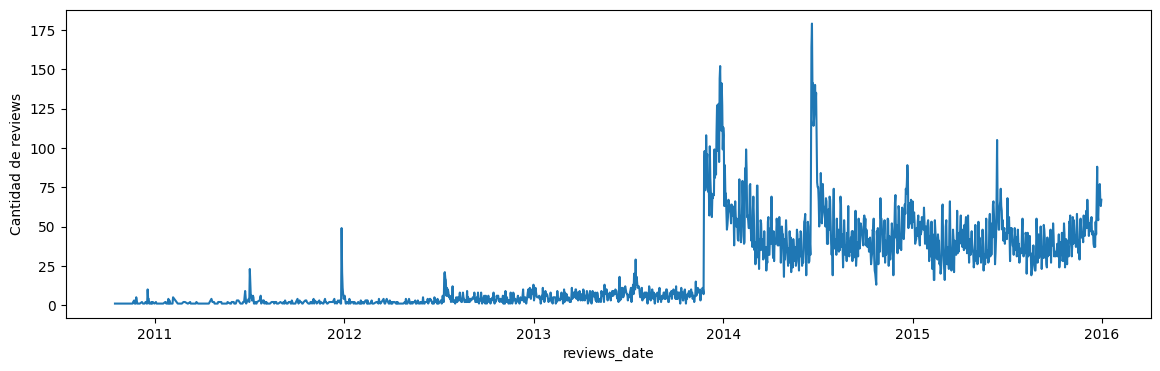

In [29]:
# Se hace un dataframe auxiliar para analizar solo las fechas (hay campos con 'Datos no disponibles')
df = df_reviews[df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Se convierte a formato fecha
df["reviews_date"] = pd.to_datetime(df["reviews_date"])
# Calcula la cantidad de review por fecha
df_counts = df.groupby("reviews_date").count()

# Se grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="reviews_date", y="reviews_recommend")
plt.ylabel('Cantidad de reviews')
plt.show()

In [30]:
print('Días de cantidad pico de reviews')
df_counts.sort_values(by='reviews_recommend', ascending=False)['reviews_recommend'][:5]

Días de cantidad pico de reviews


reviews_date
2014-06-21    179
2014-06-20    164
2013-12-26    152
2013-12-25    144
2014-06-23    141
Name: reviews_recommend, dtype: int64

Se observa que a principios del 2014 la cantidad de reviews por día es bajo, con algunos picos puntuales y luego aumenta considerablemente la cantidad de comentarios con un pico máximo el 21-06-2014 con 179 comentarios en un solo día.

## 🚀 Elección de las variables a usar en el modelo de recomendación

Para el sistema de recomendación se busca como resultado una lista de juegos recomendados a partir de indicar el nombre de un juego o el id de un usuario, basado en un puntaje que se debe decidir cómo crearlo. Para ello, se revisan los dataframe df_reviews y df_items analizados anteriormente.

In [31]:
df_reviews = pd.read_csv('data/df_reviews_unido.csv', encoding='utf-8')
df_items = pd.read_csv('data/df_items_unido.csv', encoding='utf-8')

In [32]:
df_reviews.head(2)

,user_id,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis,title,release_anio,developer
0,76561197970982479,1250,No ratings yet,True,2011-11-05,1,Killing Floor,2009,Tripwire Interactive
1,EndAtHallow,1250,No ratings yet,True,2015-01-15,1,Killing Floor,2009,Tripwire Interactive


In [33]:
df_items.head(2)

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Con los datos disponibles, se decide crear un puntaje (rating) para los juegos a partir de considerar el análisis de sentimiento de las reviews para cada juego y las recomendaciones del usuario para ese juego. 
El análisis de sentimiento esta calificado como 0 (sentimiento negativo), 1 (sentimiento neutral) y 2 (sentimiento positivo) y las recomendaciones al juego son True (cuando lo recomienda) y False (cuando no recomienda el juego). 
Con esta información se busca hacer un puntaje del 1 al 5, siendo el 1 un juego no recomendado que cuentan con reviews con sentimientos negativos y 5 un juego recomendado y con reviews positivos. Se considera esta escala en función de la combinación de las dos variables de esta manera:

* **1** si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
* **2** si el análisis de sentimiento es neutral y no es recomendado (False)
* **3** si el análisis de sentimiento es neutral pero es recomendado (True)
* **4** si el análisis de sentimiento es positivo y no es recomendado (False)
* **5** si el análisis de sentimiento es positivo y es recomendado (True)

Se arma la siguiente función:

In [34]:
def calcula_rating(row):
    
    if row["sentiment_analysis"] == 0 and not row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["reviews_recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["reviews_recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["reviews_recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["reviews_recommend"]:
        return 5
    else:
        return None

Se aplica esta función en una nueva columna sobre el dataframe `df_reviews`

In [35]:
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews.head(2)

,user_id,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis,title,release_anio,developer,rating
0,76561197970982479,1250,No ratings yet,True,2011-11-05,1,Killing Floor,2009,Tripwire Interactive,3
1,EndAtHallow,1250,No ratings yet,True,2015-01-15,1,Killing Floor,2009,Tripwire Interactive,3


Se crea un nuevo dataframe dejando solo las columnas 'user_id', 'reviews_item_id' y 'rating'.

In [36]:
df1 = df_reviews[['user_id', 'reviews_item_id', 'rating']]
df1.head(2)

,user_id,reviews_item_id,rating
0,76561197970982479,1250,3
1,EndAtHallow,1250,3


Se crea otro dataframe que contiene unicamente los 'item_id' y los nombres de los juegos.

In [37]:
df2 = df_items[['item_id', 'item_name']]
# Se borran los dumplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head(2)

Hay un total de 10978 juegos


,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic


Se agregan los nombres de los juegos al primer dataframe.

In [38]:
df = df1.merge(df2, left_on="reviews_item_id", right_on="item_id", how='left')
df

,user_id,reviews_item_id,rating,item_id,item_name
0,76561197970982479,1250,3,1250.0,Killing Floor
1,EndAtHallow,1250,3,1250.0,Killing Floor
2,76561198077432581,1250,3,1250.0,Killing Floor
3,76561198057958244,1250,1,1250.0,Killing Floor
4,46366536564574576346346546,1250,3,1250.0,Killing Floor
...,...,...,...,...,...
48797,ButtBurger2,73010,1,73010.0,Cities in Motion
48798,76561198064526566,378930,2,378930.0,Pesadelo - Regressão
48799,haungaraho,16600,5,16600.0,Trials 2: Second Edition
48800,UnseenPrecision,232950,3,232950.0,Bridge Project


Se pueden observar algunos juegos a los cuales los usuarios les hicieron comentarios, pero que no estan en el dataframe `df_reviews`. Se verifican los tipos de datos y la cantidad de nulos y luego se revisan las filas con nulos.

In [39]:
verificar_tipo_datos(df)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,reviews_item_id,[<class 'int'>],100.00,0.00,0
2,rating,[<class 'int'>],100.00,0.00,0
3,item_id,[<class 'float'>],90.58,9.42,4597
4,item_name,"[<class 'str'>, <class 'float'>]",90.58,9.42,4597


In [40]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df[df.isnull().any(axis=1)]
# Se calcula la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['reviews_item_id'].unique())} juegos con reviews pero que no estan en `df_reviews`")
sin_juegos

Hay un total de 255 juegos con reviews pero que no estan en `df_reviews`


,user_id,reviews_item_id,rating,item_id,item_name
4615,76561198077246154,440,3,NaN,NaN
4616,devvonst,440,5,NaN,NaN
4617,boydeer,440,3,NaN,NaN
4618,jarrodtrim,440,5,NaN,NaN
4619,76561198067936203,440,3,NaN,NaN
...,...,...,...,...,...
48756,Sabatonic,270941,5,NaN,NaN
48757,UnseenPrecision,72760,3,NaN,NaN
48764,camo88,398913,5,NaN,NaN
48775,madengineer,343462,5,NaN,NaN


Se decide borrarlos del dataframe.

In [41]:
# Se borran los nulos
df = df.dropna(subset=['item_id'])
# Se cuentan los registros que quedan
print(f'Quedan {df.shape[0]} registros')
# Se verifican los tipo de datos y nulos
verificar_tipo_datos(df)

Quedan 44205 registros


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,reviews_item_id,[<class 'int'>],100.0,0.0,0
2,rating,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'float'>],100.0,0.0,0
4,item_name,[<class 'str'>],100.0,0.0,0


Se convierte en entero la columna 'item_id' y se crea un último dataframe con las columnas necesarias para los modelos de recomendación.

In [42]:
df = df[['user_id', 'item_name', 'rating']]
df.head(3)

,user_id,item_name,rating
0,76561197970982479,Killing Floor,3
1,EndAtHallow,Killing Floor,3
2,76561198077432581,Killing Floor,3


En el gráfico se puede ver la cantidad de reviews distribuidos por el puntaje adoptado.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\922675018.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0], palette=colores)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\922675018.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1], palette=colores)


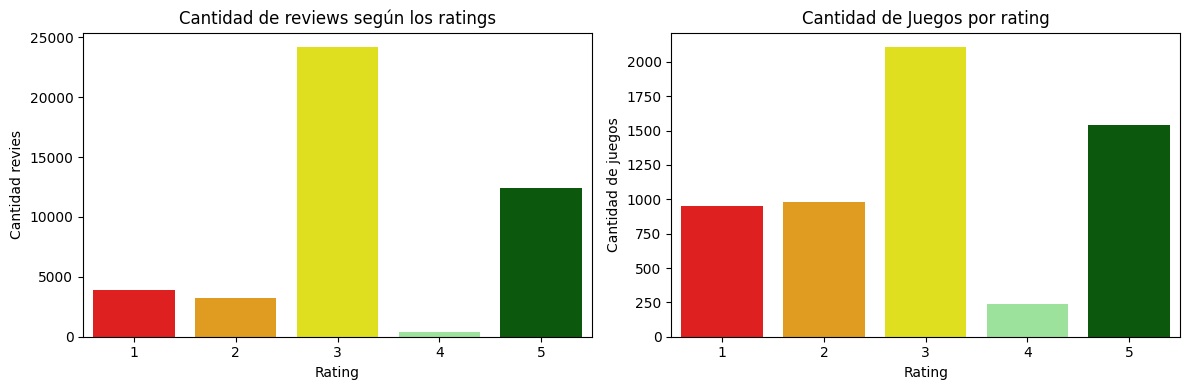

In [43]:
# Se agrupan las calificaciones por rating
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Se agrupan los juegos únicos por rating
unique_games_per_rating = df.groupby('rating')['item_name'].nunique().reset_index()

# Definir los colores para cada rating
colores = ['red', 'orange', 'yellow', 'lightgreen', 'darkgreen']

# Se crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0], palette=colores)
axes[0].set_title('Cantidad de reviews según los ratings') ; axes[0].set_xlabel('Rating') ; axes[0].set_ylabel('Cantidad revies')

# Segundo subplot
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1], palette=colores)
axes[1].set_title('Cantidad de Juegos por rating') ; axes[1].set_xlabel('Rating') ; axes[1].set_ylabel('Cantidad de juegos')

# Se ajusta y  se muestran los graficos
plt.tight_layout()
plt.show()

In [44]:
# Cantidades de review por rating
resumen_cant_porcentaje(df, 'rating')

,Cantidad,Porcentaje
rating,,
3,24160,54.65
5,12455,28.18
1,3908,8.84
2,3252,7.36
4,430,0.97


In [45]:
# Cantidades de juegos por rating
unique_games_per_rating

,rating,item_name
0,1,954
1,2,980
2,3,2106
3,4,240
4,5,1539


Se puede ver en la gráfica de la derecha que la mayoría de las reviews tienen un 'rating' de 3, correspondiente a sentimientos neutrales pero que recomiendan el juego, siendo 24160 reviews (casi el 55% de los comentarios) en esta categoría. Le siguen 12455 reviews con sentimientos positivos y que recomiendan los juegos comentados. Y se observan menos de 4000 comentarios con sentimiento negativo. Por otro lado, en la gráfica de la izquierda se pueden observa cerca de 1600 juegos recomendados.

## 📥 Se guarda el dataframe a utilizar en el modelo de recomendación.

In [46]:
df.to_csv('data/df_recomendacion.csv', index=False, encoding='utf-8')
print(f"Se guardado como 'data/df_recomendacion.csv'")

Se guardado como 'data/df_recomendacion.csv'
